[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1u7PDeJVGaIL4q7z0tmjBrG4PaQaVI2yv/view?usp=sharing)

# Medidas de Similaridade

O código presente neste notebook mostram as diferenças existentes entre as medidas de distância e similaridade para calcular proximidade entre pontos. Para isso, serão usados somente alguns poucos pontos em um espaço 2-D.

A maioria das medidas podem ser utilizadas a partir do pacote `dist` do `scipy`. Vamos também utilizar os pacotes `matplotlib` e `seaborn` para visualizar os dados.

In [ ]:
# Importar bibliotecas
import scipy.spatial.distance as dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Função para plotar os pontos no espaço 2D
def plot(X):
  ax = plt.axes()
  for i in range(X.shape[0]):
      ax.scatter(X[i,0], X[i,1], label='x'+str(i))

  ax.legend()
  return ax
  #ax.show()

In [ ]:
# Definição da matriz de pontos
X = np.zeros((5,2))
X[0,:] = [1,1]
X[1,:] = [4,1]
X[2,:] = [30,30]
X[3,:] = [33,40]
X[4,:] = [44,48]

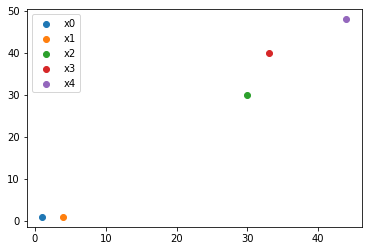

In [ ]:
_ = plot(X) 

In [ ]:
# Calcula a distância euclidiana entre os pontos
euc = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    euc[i,j] = dist.euclidean(X[i,:],X[j,:])

euc_df = pd.DataFrame(euc)
display(euc_df)

,0,1,2,3,4
0,0.000000,3.000000,41.012193,50.447993,63.702433
1,3.000000,0.000000,38.948684,48.600412,61.717096
2,41.012193,38.948684,0.000000,10.440307,22.803509
3,50.447993,48.600412,10.440307,0.000000,13.601471
4,63.702433,61.717096,22.803509,13.601471,0.000000


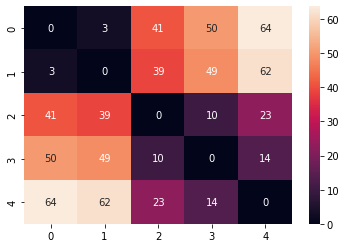

In [ ]:
# Visualiza a distância euclidiana na forma de heatmap para entender a relação entre os pontos
sns.heatmap(euc_df, annot=True)

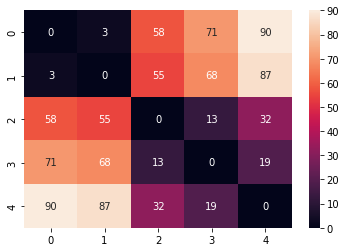

In [ ]:
# Calcula a distância cityblock (manhattan)
cit = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    cit[i,j] = dist.cityblock(X[i,:],X[j,:])

cit_df = pd.DataFrame(cit)
sns.heatmap(cit_df, annot=True)

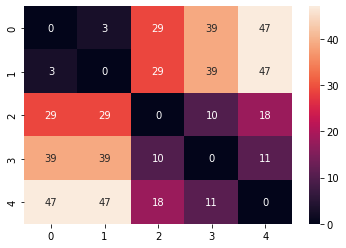

In [ ]:
# Distância de Chebyshev
che = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    che[i,j] = dist.chebyshev(X[i,:],X[j,:])

che_df = pd.DataFrame(che)
sns.heatmap(che_df, annot=True)

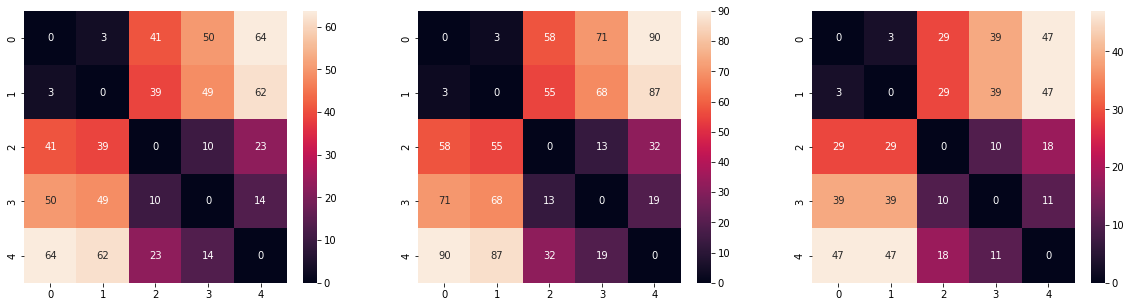

In [ ]:
# Visualização dos três heatmaps lado a lado
# Apesar da diferença de valores, o comportamento é bastante semalhante
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.heatmap(euc_df, annot=True, ax=axes[0])
sns.heatmap(cit_df, annot=True, ax=axes[1])
sns.heatmap(che_df, annot=True, ax=axes[2])

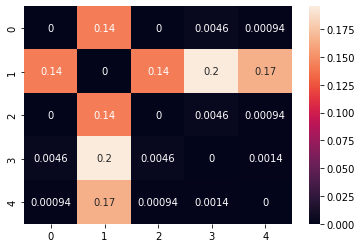

In [ ]:
# Cálculo da distância baseada na similaridade do cosseno (1-simlaridade)
cos = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    cos[i,j] = dist.cosine(X[i,:],X[j,:])

cos_df = pd.DataFrame(cos)
sns.heatmap(cos_df, annot=True)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:714: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


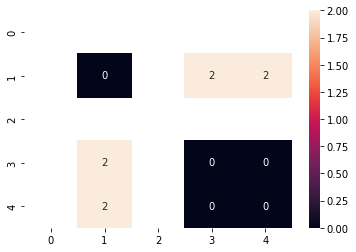

In [ ]:
# Cálculo da distância baseada na correlação (1-correlação)
cor = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    cor[i,j] = dist.correlation(X[i,:],X[j,:])

cor_df = pd.DataFrame(cor)
sns.heatmap(cor_df, annot=True)

Note que faltam alguns valores. Como a correlação é baseada na covariância dos valores, nos pontos variância igual a zero, não é possível calcular a correlação.

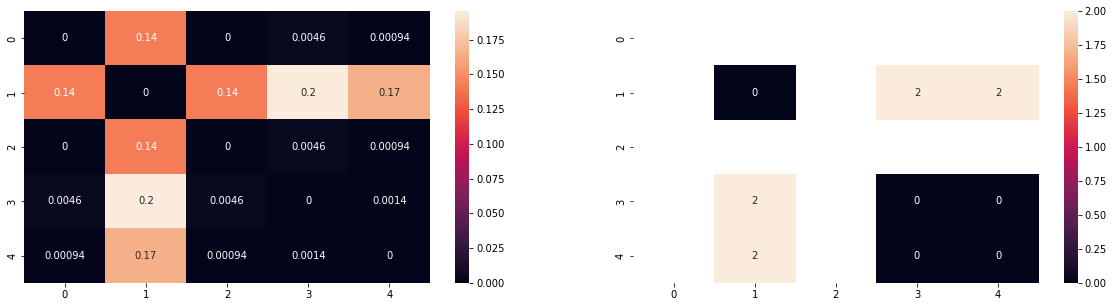

In [ ]:
# Mostra os valores da distância do cosseno e correlação lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.heatmap(cos_df, annot=True, ax=axes[0])
sns.heatmap(cor_df, annot=True, ax=axes[1])

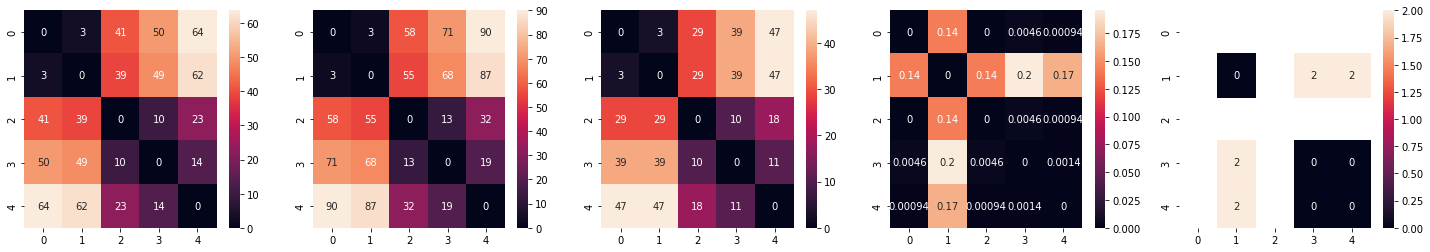

In [ ]:
# Vendo todos os valores
fig, axes = plt.subplots(1, 5, figsize=(25,4))
sns.heatmap(euc_df, annot=True, ax=axes[0])
sns.heatmap(cit_df, annot=True, ax=axes[1])
sns.heatmap(che_df, annot=True, ax=axes[2])
sns.heatmap(cos_df, annot=True, ax=axes[3])
sns.heatmap(cor_df, annot=True, ax=axes[4])

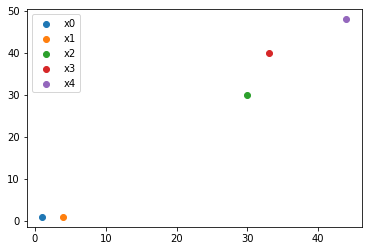

In [ ]:
# Visualizar novamente os pontos
plot(X)

Correlação A para B: 3.3306690738754696e-16
Correlação A para C: 1.4923659639173308
Correlação B para C: 1.492365963917331


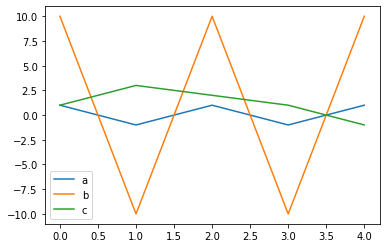

In [ ]:
# Definição de novos pontos para entender a correlação
a = np.array([1,-1,1,-1,1])
b = np.array([10,-10,10,-10,10])
c = np.array([1,3,2,1,-1])

plt.plot(a,label='a')
plt.plot(b,label='b')
plt.plot(c,label='c')
plt.legend(['a', 'b', 'c'])

print(f'Correlação A para B: {dist.correlation(a,b)}')
print(f'Correlação A para C: {dist.correlation(a,c)}')
print(f'Correlação B para C: {dist.correlation(b,c)}')

Veja que, mesmo mais distantes no espaço a correlação entre `a` e `b` é bem maior.